<img src="https://iili.io/2nepDYl.png">

#### Este conjunto de dados fornece uma visão geral detalhada das rotinas de exercícios, atributos físicos e métricas de condicionamento físico dos membros da academia. Ele contém 973 amostras de dados de academia, incluindo indicadores-chave de desempenho, como frequência cardíaca, calorias queimadas e duração do treino. Cada entrada também inclui dados demográficos e níveis de experiência, permitindo uma análise abrangente dos padrões de condicionamento físico, progressão do atleta e tendências de saúde.

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SUMÁRIO</p>   
    
* [1. IMPORTAÇÃO DAS BIBLIOTECAS](#1)
    
* [2. CARREGAMENTO DOS DADOS](#2)
    
* [3. LIMPEZA DOS DADOS](#3)
    
* [4. A DEFINIR](#4)   
    
* [5. A DEFINIR](#5)
      
* [6. A DEFINIR](#6)
    
* [7. A DEFINIR](#7)
    
* [8. A DEFINIR](#8)
    
* [9. A DEFINIR](#9)
    
* [10. A DEFINIR](#10)


### IMPORTAÇÃO DAS BIBLIOTECAS

In [83]:
# Importando as bibliotecas necessárias

## >> TRABALHA COM DADOS
import numpy as np               # Biblioteca para manipulação de arrays e funções matemáticas
import pandas as pd              # Biblioteca para manipulação de dados em formato de DataFrames

## >> TRABALHA COM GRÁFICOS
import matplotlib                # Biblioteca para criar visualizações gráficas
import matplotlib.pyplot as plt  # Sub-biblioteca do Matplotlib para visualizações simples
from matplotlib import colors    # Ferramentas de cores para gráficos
import seaborn as sns            # Biblioteca para visualizações estatísticas
import matplotlib.pyplot as plt, numpy as np     # Reimportando, para visualizações e manipulação de arrays
from mpl_toolkits.mplot3d import Axes3D          # Biblioteca para criar gráficos em 3D
from matplotlib.colors import ListedColormap     # Ferramenta para criar mapas de cores personalizados

## >> TRABALHA COM PRE PROCESSAMENTO
from sklearn.preprocessing import LabelEncoder  # Classe para codificação de rótulos (labels)
from sklearn.preprocessing import StandardScaler  # Classe para padronização dos dados

## >> TRABALHA COM MODELO DE ML
from sklearn.decomposition import PCA            # Classe para redução de dimensionalidade (Análise de Componentes Principais)
from yellowbrick.cluster import KElbowVisualizer  # Visualizador para encontrar o número ideal de clusters
from sklearn.cluster import KMeans               # Algoritmo K-Means para clustering
from sklearn.cluster import AgglomerativeClustering  # Algoritmo de clustering hierárquico

## >> TRABALHA COM AVALIAR O MODELO
from sklearn import metrics                      # Métricas para avaliação de modelos


## >> TRABALHA COM OUTRAS BIBLIOTECAS
import datetime                                  # Biblioteca para trabalhar com datas e horários
import warnings                                  # Biblioteca para gerenciar avisos
import sys                                       # Biblioteca para manipulação do sistema

# Ignorando avisos para evitar distrações no output
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Fixando o valor da semente para garantir a reprodutibilidade dos resultados
np.random.seed(42)


### CARREGAMENTO DOS DADOS

In [84]:
# Carregando o dataset
data = pd.read_csv("gym_members_exercise_tracking.csv")
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [85]:
# Lista de colunas traduzidas para o português
colunas = ['Idade', 
           'Gênero', 
           'Peso (kg)', 
           'Altura (m)', 
           'Max BPM', 
           'Média BPM', 
           'Repouso BPM', 
           'Duração Sessão (horas)', 
           'Calorias queimadas',
           'Tipo de Treino',
           'Percentual de Gordura',
           'Ingestão de Água (litro)',
           'Frequência de Treino (dia/semana)',
           'Nível de Experiência',
           'IMC'
]

data.columns = colunas

print("Número de pontos de dados:", len(data))

Número de pontos de dados: 973


### Explicação de cada coluna
#### Idade: Idade do membro da academia.
#### Gênero: Gênero do frequentador da academia (Masculino ou Feminino).
#### Peso (kg): Peso do membro em quilogramas.
#### Altura (m): Altura do membro em metros.
#### Max BPM: Frequência cardíaca máxima (batimentos por minuto) durante as sessões de treino.
#### Média BPM: Frequência cardíaca média durante sessões de treino.
#### Repouso BPM: Frequência cardíaca em repouso antes do treino.
#### Duração Sessão (horas): Duração de cada sessão de treino em horas.
#### Calorias queimadas: Total de calorias queimadas durante cada sessão.
#### Tipo de Treino: Tipo de treino realizado (por exemplo, Cardio, Força, Yoga, HIIT).
#### Percentual de Gordura: percentual de gordura corporal do membro.
#### Ingestão de Água (litro): Ingestão diária de água durante os treinos.
#### Frequência de Treino (dia/semana): Número de sessões de treino por semana.
#### Nível de Experiência: Nível de experiência, de iniciante (1) a especialista (3).
#### IMC: Índice de Massa Corporal, calculado a partir da altura e do peso.

In [86]:
data.head()

,Idade,Gênero,Peso (kg),Altura (m),Max BPM,Média BPM,Repouso BPM,Duração Sessão (horas),Calorias queimadas,Tipo de Treino,Percentual de Gordura,Ingestão de Água (litro),Frequência de Treino (dia/semana),Nível de Experiência,IMC
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [87]:
data.shape[0]

print("Temos {} linhas e {} colunas no dataset.".format(data.shape[0], data.shape[1]))

Temos 973 linhas e 15 colunas no dataset.


## LIMPEZA DOS DADOS

**Nesta seção**
* Limpeza dos Dados

Para compreender melhor as etapas necessárias para limpar o dataset, vamos examinar as informações presentes nos dados.

In [88]:
# Informações sobre os atributos do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Idade                              973 non-null    int64  
 1   Gênero                             973 non-null    object 
 2   Peso (kg)                          973 non-null    float64
 3   Altura (m)                         973 non-null    float64
 4   Max BPM                            973 non-null    int64  
 5   Média BPM                          973 non-null    int64  
 6   Repouso BPM                        973 non-null    int64  
 7   Duração Sessão (horas)             973 non-null    float64
 8   Calorias queimadas                 973 non-null    float64
 9   Tipo de Treino                     973 non-null    object 
 10  Percentual de Gordura              973 non-null    float64
 11  Ingestão de Água (litro)           973 non-null    float64


**A partir do resultado acima, podemos concluir e observar que:**

* Não existem valores ausentes na coluna de renda
* Existem algumas variáveis categóricas no nosso DataFrame (identificadas como dtype: object). Portanto, precisaremos codificá-las em formas numéricas mais tarde.



### CONHECENDO OS DADOS

#### Começando pelos dados categóricos (object)

In [89]:
data.select_dtypes(include=object).columns.values

array(['Gênero', 'Tipo de Treino'], dtype=object)

In [90]:
# Distribuição por Gênero e Tipo de Treino
data.groupby(['Gênero','Tipo de Treino']).size()

Gênero  Tipo de Treino
Female  Cardio            126
        HIIT              107
        Strength          123
        Yoga              106
Male    Cardio            129
        HIIT              114
        Strength          135
        Yoga              133
dtype: int64

#### Medidas estatísticas sobre os dados numéricos

In [91]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Peso (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Altura (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Média BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Repouso BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Duração Sessão (horas),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calorias queimadas,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Percentual de Gordura,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Ingestão de Água (litro),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [92]:
# Configurando preferências de cores
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})  # Definindo a cor de fundo dos gráficos
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<Axes: xlabel='Nível de Experiência', ylabel='Calorias queimadas'>

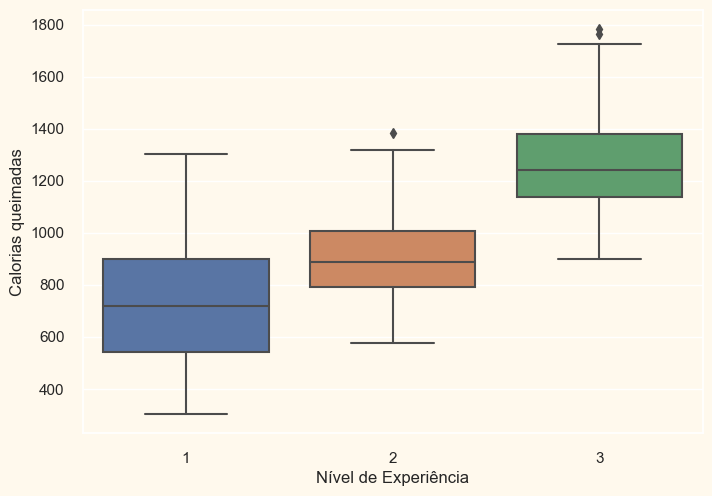

In [93]:
# O nível de experiência influencia nas calorias queimadas?
sns.boxplot(data=data, x='Nível de Experiência', y='Calorias queimadas')

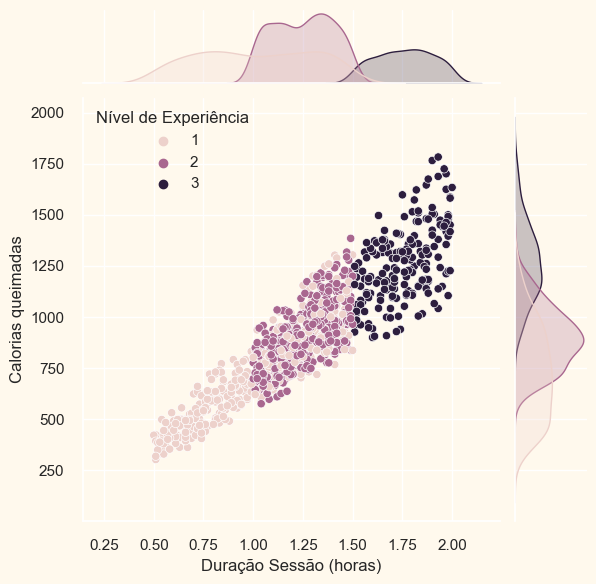

In [94]:
# A duração influencia nas calorias queimadas? O nível de experiência influencia na duração?
sns.jointplot(data=data, x='Duração Sessão (horas)', y='Calorias queimadas', hue='Nível de Experiência')

<Axes: xlabel='Frequência de Treino (dia/semana)', ylabel='Count'>

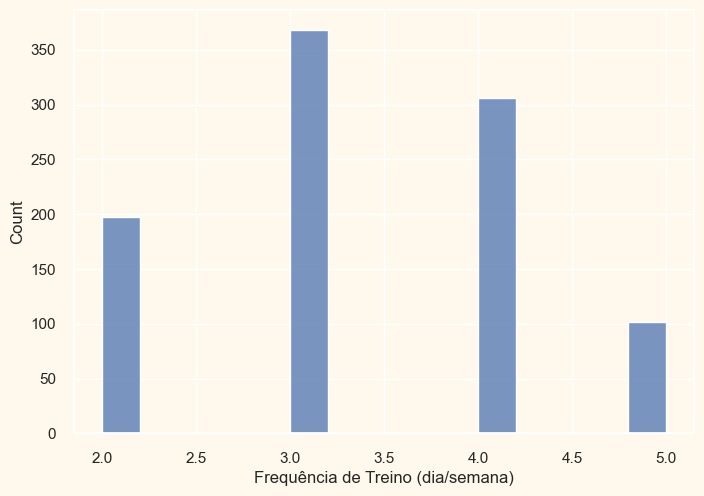

In [95]:
# Como está distribuída a frequência de treino?
sns.histplot(data=data, x='Frequência de Treino (dia/semana)')

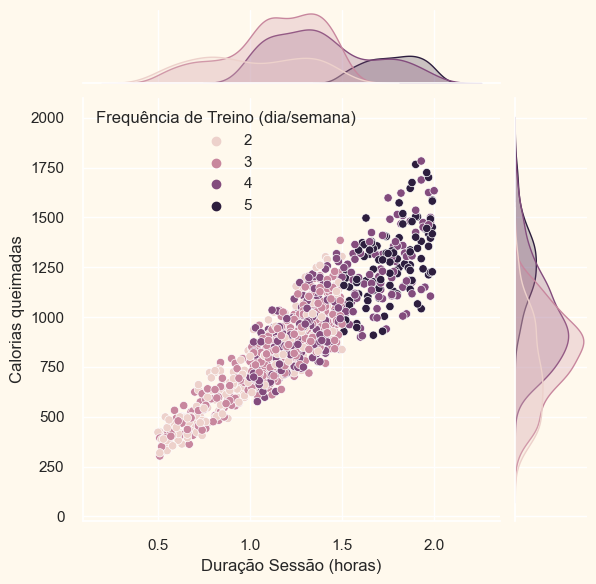

In [96]:
# Pessoas que vão mais na academia, possuem treinos mais longos e queimam mais calorias?
sns.jointplot(data=data, x='Duração Sessão (horas)', y='Calorias queimadas', hue='Frequência de Treino (dia/semana)')

<Axes: >

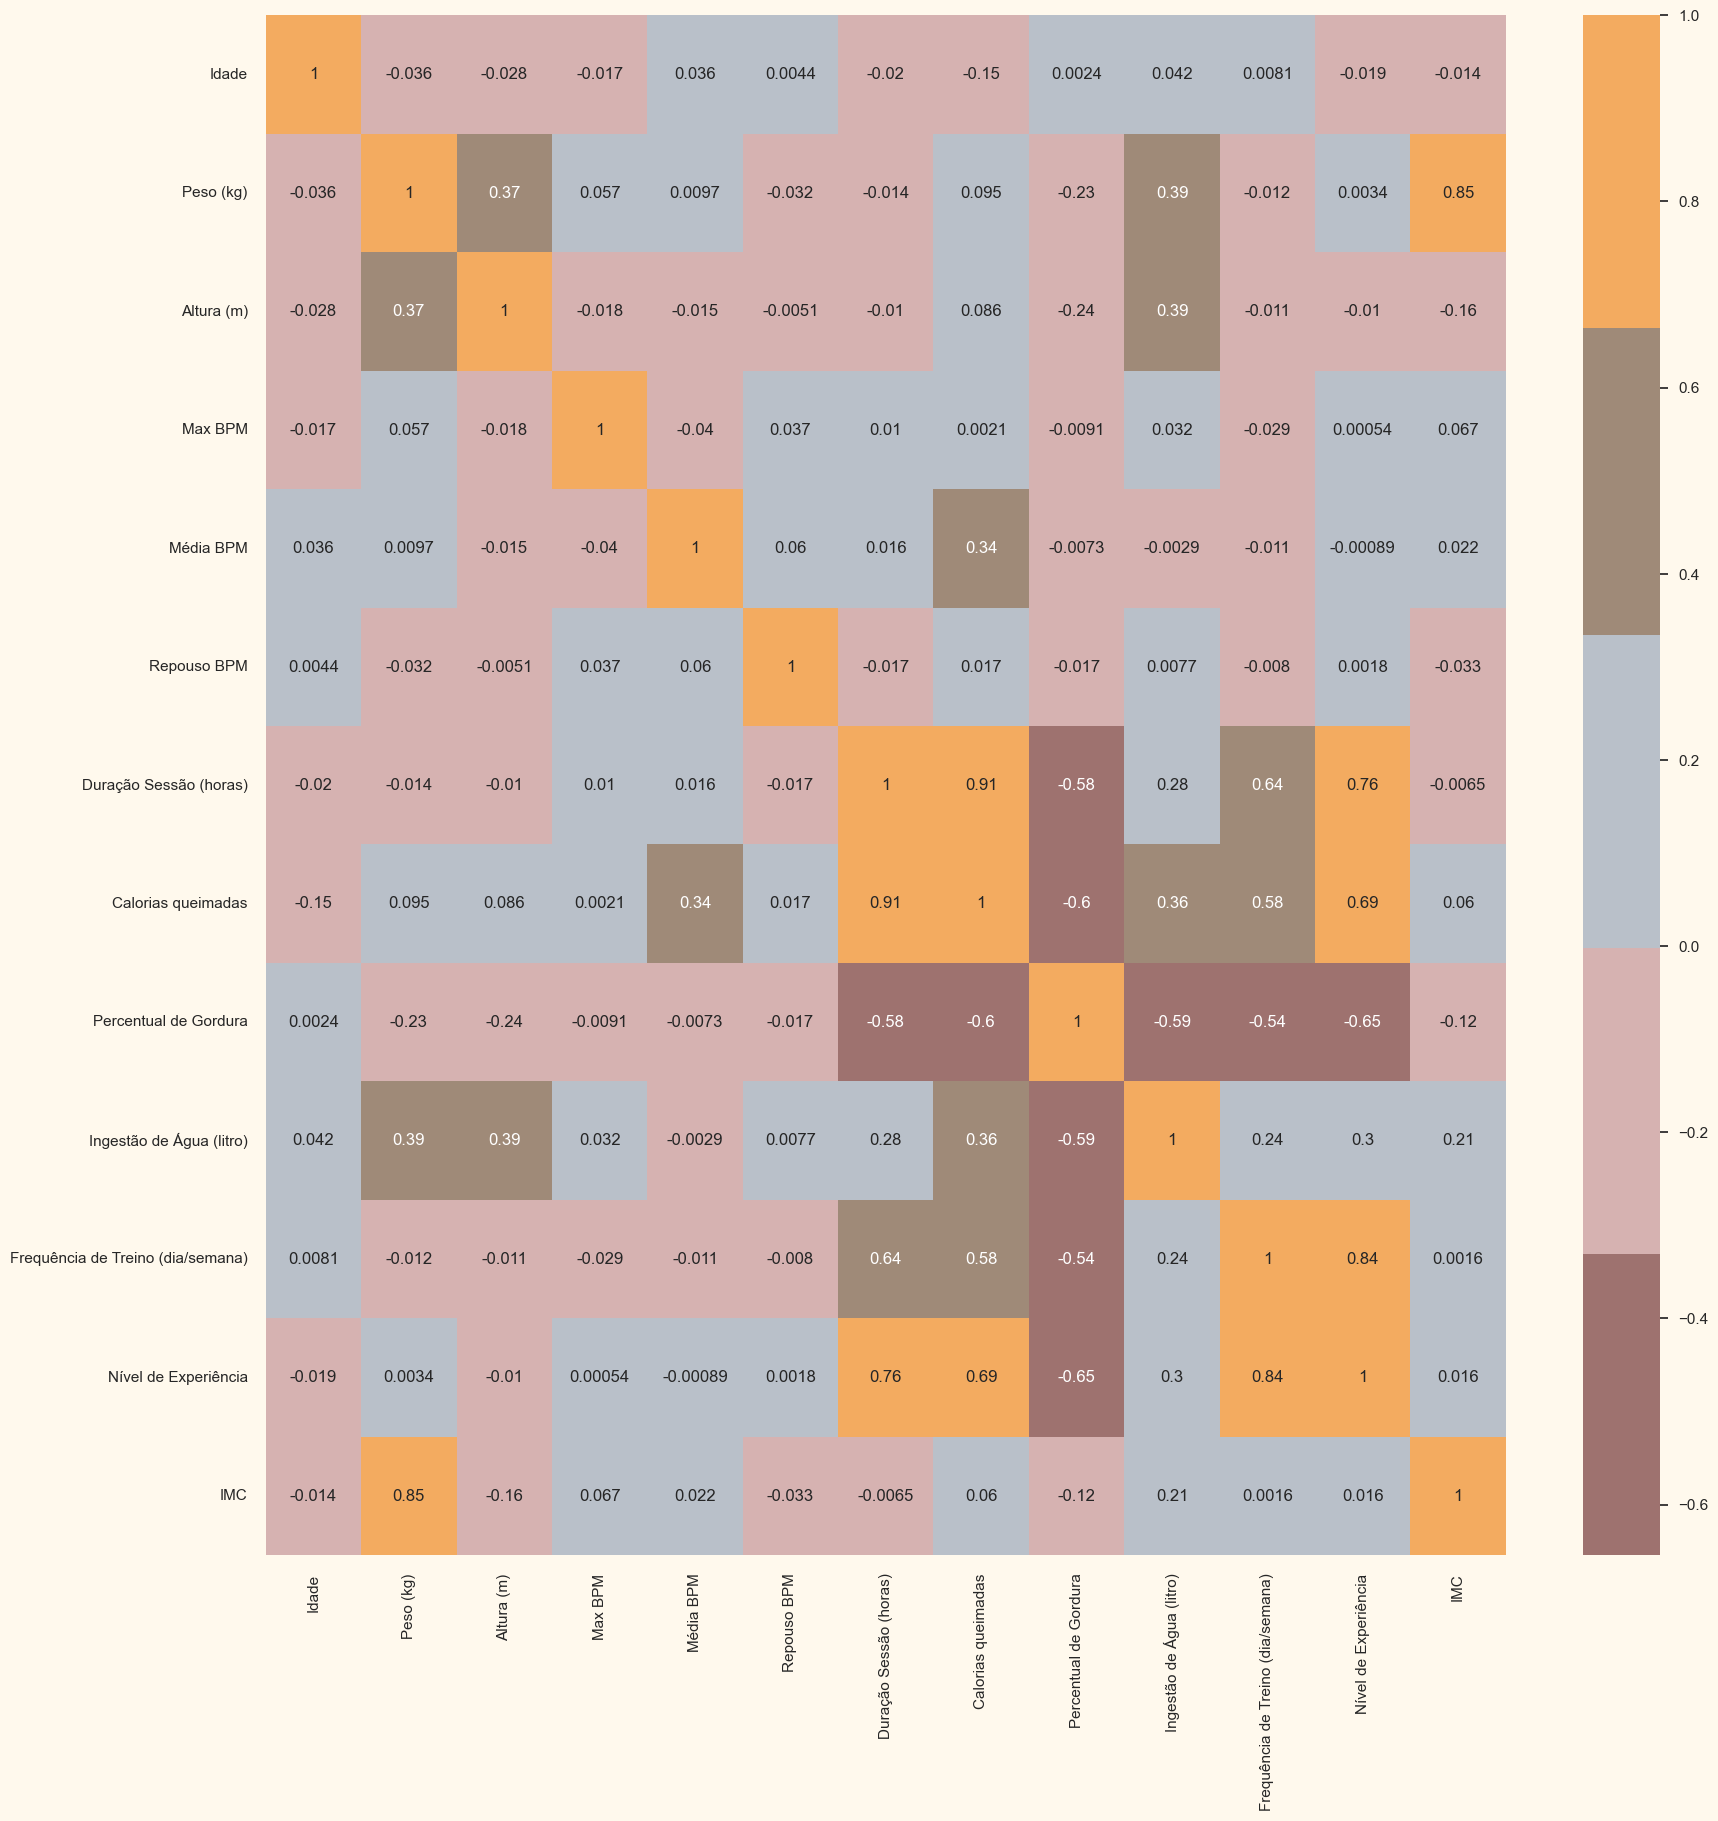

In [97]:
# Matriz de correlação
corrmat = data.corr()  # Calcula a matriz de correlação entre as variáveis numéricas
plt.figure(figsize=(20, 20))  # Define o tamanho do gráfico

# Cria o mapa de calor para visualizar as correlações
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
